In [28]:
import numpy as np
import pandas as pd
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
news = pd.read_csv('cnn-6.csv')
news

,url,channel.name,program.name,uid,duration,year,month,date,time,timezone,path,wordcount,subhead,text
0,http://transcripts.cnn.com/TRANSCRIPTS/1205/19...,WWW,CNN LIVE EVENT/SPECIAL,NaN,NaN,2012,5,19,14:30,ET,NaN,NaN,The Fighting Prince,"MAX FOSTER, CNN ROYAL CORRESPONDENT (voice-ove..."
1,http://transcripts.cnn.com/TRANSCRIPTS/1205/19...,WWW,CNN NEWSROOM,NaN,NaN,2012,5,19,17:00,ET,NaN,NaN,"G-8 Talks Cover Sanctions, Possible Oil Disrup...","DON LEMON, CNN ANCHOR: It's the economy, stup..."
2,http://transcripts.cnn.com/TRANSCRIPTS/1205/19...,WWW,CNN NEWSROOM,NaN,NaN,2012,5,19,15:00,ET,NaN,NaN,Wildfires Intensify in Arizona; Storm Bears Do...,"(COMMERCIAL BREAK) FREDRICKA WHITFIELD, CNN AN..."
3,http://transcripts.cnn.com/TRANSCRIPTS/1205/19...,WWW,CNN NEWSROOM,NaN,NaN,2012,5,19,16:00,ET,NaN,NaN,Terrorism Threats in Chicago; Chinese Activist...,"FREDRICKA WHITFIELD, CNN ANCHOR: All right, w..."
4,http://transcripts.cnn.com/TRANSCRIPTS/1205/19...,WWW,CNN NEWSROOM,NaN,NaN,2012,5,19,19:00,ET,NaN,NaN,Summit Cities Brace for Trouble; World Economy...,"DON LEMON, CNN ANCHOR: Hello, everyone. I'm ..."
5,http://transcripts.cnn.com/TRANSCRIPTS/1205/19...,WWW,CNN NEWSROOM,NaN,NaN,2012,5,19,22:00,ET,NaN,NaN,President Obama Headed to NATO Summit in Chica...,"DON LEMON, CNN HOST: Hello, everyone. I..."
6,http://transcripts.cnn.com/TRANSCRIPTS/1205/19...,WWW,CNN NEWSROOM,NaN,NaN,2012,5,19,14:00,ET,NaN,NaN,NATO Protesters Charged with Domestic Terroris...,"FREDRICKA WHITFIELD, CNN ANCHOR: Hello, every..."
7,http://transcripts.cnn.com/TRANSCRIPTS/1205/19...,WWW,CNN NEWSROOM,NaN,NaN,2012,5,19,12:00,ET,NaN,NaN,European Economic Crisis Dominates G-8 Talks; ...,"FREDRICKA WHITFIELD, CNN ANCHOR: We're g..."
8,http://transcripts.cnn.com/TRANSCRIPTS/1205/19...,WWW,CNN PRESENTS,NaN,NaN,2012,5,19,20:00,ET,NaN,NaN,Voters in America: Vets Wanted,"(BEGIN VIDEO CLIP) J.R. MARTINEZ, HOST: When ..."
9,http://transcripts.cnn.com/TRANSCRIPTS/1205/19...,WWW,CNN SATURDAY MORNING NEWS,NaN,NaN,2012,5,19,06:00,ET,NaN,NaN,Glitch In Historic Launch; New Details In Tray...,"RANDI KAYE, CNN ANCHOR: From CNN Center in Atl..."


In [5]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')

wnl = nltk.wordnet.WordNetLemmatizer()
analyzer = CountVectorizer().build_analyzer() # Override default analyzer of CountVectorizer
stop_words_skt = set(text.ENGLISH_STOP_WORDS) # Use default stopwords in Scikit-Learn

def penn2morphy(penntag):
    # convert penntag to morphy tag to make it usable for lemmatization
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'


def lemmatize_string(text):
    # Text input is text string, returns array of lemmatized and lower-cased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag))
            for word, tag in nltk.pos_tag(nltk.word_tokenize(text))]


def lemmatize_list(list_word):
    # Text input is a list, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag))
            for word, tag in pos_tag(list_word)]


def check_number(word): 
    # Check if a word is a number
    try: 
        float(word) 
        return True 
    except ValueError: 
        return False

    
def remove_digits_and_lemmatize(doc):
    # Anylyzer for remove numbers and lemmatize the doc
    return (word for word in lemmatize_list(analyzer(doc)) if word\
            not in stop_words_skt and not check_number(word))


def remove_digits_only(doc):
    # Anylyzer for remove numbers in the doc
    return (word for word in analyzer(doc) if word\
            not in stop_words_skt and not check_number(word))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yrver\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\yrver\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yrver\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yrver\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#Vectorize training and test data, remove digits and do lemmatization
vectorizer = CountVectorizer(min_df=3, analyzer=remove_digits_and_lemmatize)
word_counts = vectorizer.fit_transform(news['subhead'])
print("w/ lemmatization")
print("The shape of training set after vectorization is %s" % (word_counts.shape,))
print("-"*20)

w/ lemmatization
The shape of training set after vectorization is (23536, 9397)
--------------------


In [9]:
len(vectorizer.get_feature_names())

9397

In [17]:
counts = word_counts.toarray()
counts

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
# Frequency for each word
freq=pd.DataFrame(counts)
freq=freq.sum()
#freq.sort_values(ascending=False)

4341    4269
5708    4188
5833    4056
6496    1987
8317    1715
3292    1574
7449    1471
4667    1466
8647    1435
9346    1382
7215    1301
8103    1232
2149    1224
7367    1211
4044    1201
8038    1164
8343    1155
5598    1132
558     1130
7626    1109
6994    1094
3725    1078
8265    1029
9386    1024
1850    1017
9269    1009
9285     997
1344     975
2169     971
8757     969
        ... 
4886       3
1203       3
4882       3
1206       3
4880       3
4984       3
1175       3
4986       3
5051       3
5084       3
5081       3
5079       3
1150       3
5064       3
5063       3
5054       3
1155       3
1156       3
1160       3
4995       3
5033       3
5032       3
1164       3
5031       3
5026       3
5023       3
5012       3
5006       3
1172       3
9396       3
Length: 9397, dtype: int64

In [24]:
word_freq = pd.DataFrame(freq.values, index=freq.index, columns=['Frequency'])
word_freq

,Frequency
0,4
1,6
2,3
3,8
4,10
5,6
6,5
7,5
8,7
9,3


In [25]:
word_freq['Word']=vectorizer.get_feature_names()
word_freq

,Frequency,Word
0,4,100k
1,6,100m
2,3,10m
3,8,10th
4,10,113th
5,6,11th
6,5,12th
7,5,14th
8,7,15th
9,3,16th


In [26]:
top_word = word_freq.sort_values(by=['Frequency'], ascending=False)
top_word

,Frequency,Word
4341,4269,interview
5708,4188,new
5833,4056,obama
6496,1987,president
8317,1715,syria
3292,1574,flight
7449,1471,search
4667,1466,kill
8647,1435,trial
9346,1382,year


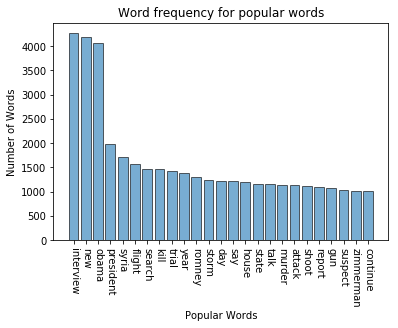

In [43]:
x=top_word['Word'][:25]
y=top_word['Frequency'][:25]
plt.figure(1)
plt.xlabel("Popular Words")
plt.xticks(rotation=270)
plt.ylabel("Number of Words")
plt.xticks(np.arange(25, step=1))
plt.bar(x.values, height=y.values, edgecolor='black', alpha=0.6)
plt.title("Word frequency for popular words")
plt.show()

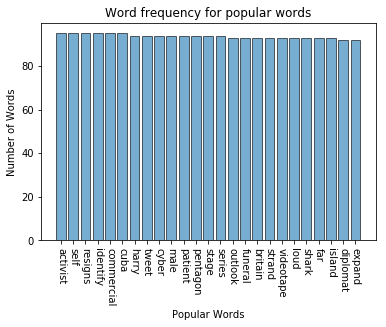

In [44]:
x=top_word['Word'][1000:1025]
y=top_word['Frequency'][1000:1025]
plt.figure(1)
plt.xlabel("Popular Words")
plt.xticks(rotation=270)
plt.ylabel("Number of Words")
plt.xticks(np.arange(25, step=1))
plt.bar(x.values, height=y.values, edgecolor='black', alpha=0.6)
plt.title("Word frequency for popular words")
plt.show()

In [46]:
total = pd.DataFrame(counts, columns=vectorizer.get_feature_names())

,100k,100m,10m,10th,113th,11th,12th,14th,15th,16th,...,zinger,zip,zodiac,zombie,zone,zoo,zoraida,zuckerberg,zurich,zynga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
date=pd.to_datetime(news['year']*10000+news['month']*100+news['date'],format='%Y%m%d')
date

0       2012-05-19
1       2012-05-19
2       2012-05-19
3       2012-05-19
4       2012-05-19
5       2012-05-19
6       2012-05-19
7       2012-05-19
8       2012-05-19
9       2012-05-19
10      2012-05-19
11      2012-05-19
12      2012-05-19
13      2012-05-19
14      2012-05-19
15      2012-05-19
16      2012-05-19
17      2012-05-19
18      2012-05-19
19      2012-05-20
20      2012-05-20
21      2012-05-20
22      2012-05-20
23      2012-05-20
24      2012-05-20
25      2012-05-20
26      2012-05-20
27      2012-05-20
28      2012-05-20
29      2012-05-20
           ...    
23506   2014-06-17
23507   2014-06-17
23508   2014-06-17
23509   2014-06-17
23510   2014-06-17
23511   2014-06-17
23512   2014-06-17
23513   2014-06-17
23514   2014-06-17
23515   2014-06-17
23516   2014-06-17
23517   2014-06-17
23518   2014-06-17
23519   2014-06-17
23520   2014-06-17
23521   2014-06-17
23522   2014-06-17
23523   2014-06-17
23524   2014-06-17
23525   2014-06-17
23526   2014-06-17
23527   2014

In [51]:
total['date']=date
total

,100k,100m,10m,10th,113th,11th,12th,14th,15th,16th,...,zinger,zip,zodiac,zombie,zone,zoo,zoraida,zuckerberg,zurich,zynga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
time_group = total.groupby(pd.Grouper(key='date', freq='M')).sum()

In [55]:
time_group

,100k,100m,10m,10th,113th,11th,12th,14th,15th,16th,...,zinger,zip,zodiac,zombie,zone,zoo,zoraida,zuckerberg,zurich,zynga
date,,,,,,,,,,,,,,,,,,,,,
2012-05-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
2012-06-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2012-07-31,0,3,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2012-08-31,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,6,0,0,1,0,0
2012-09-30,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,2,1,0,0,0,0
2012-10-31,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
2012-11-30,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,4,2,0,0,0,0
2012-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,2,0,0
2013-01-31,0,0,0,0,10,0,1,0,0,0,...,1,0,0,1,4,0,0,0,1,0


In [57]:
top_25_word=top_word['Word'][:25]
top_25_word.values

array(['interview', 'new', 'obama', 'president', 'syria', 'flight',
       'search', 'kill', 'trial', 'year', 'romney', 'storm', 'day', 'say',
       'house', 'state', 'talk', 'murder', 'attack', 'shoot', 'report',
       'gun', 'suspect', 'zimmerman', 'continue'], dtype=object)

In [62]:
time_group_hot = time_group[top_25_word.values]
time_group_hot

,interview,new,obama,president,syria,flight,search,kill,trial,year,...,state,talk,murder,attack,shoot,report,gun,suspect,zimmerman,continue
date,,,,,,,,,,,,,,,,,,,,,
2012-05-31,80,42,69,23,50,14,6,22,12,27,...,4,16,21,17,2,4,0,15,6,6
2012-06-30,191,143,167,109,107,7,8,50,95,27,...,24,25,22,13,24,33,6,12,66,36
2012-07-31,165,116,135,61,113,20,18,65,19,23,...,96,36,21,54,74,74,37,66,31,31
2012-08-31,175,167,149,66,98,9,12,55,16,32,...,52,23,23,49,90,21,14,23,4,33
2012-09-30,171,133,308,192,39,12,20,71,10,45,...,48,35,18,101,8,44,10,15,1,34
2012-10-31,165,187,228,39,34,10,6,27,15,38,...,56,24,14,80,19,23,2,14,6,13
2012-11-30,171,181,223,110,30,3,7,36,8,26,...,48,51,17,49,8,27,5,2,1,49
2012-12-31,181,104,122,95,92,4,18,88,5,82,...,82,78,28,32,110,45,160,13,6,41
2013-01-31,228,212,205,158,23,3,15,37,44,73,...,74,53,28,36,53,51,339,23,0,31


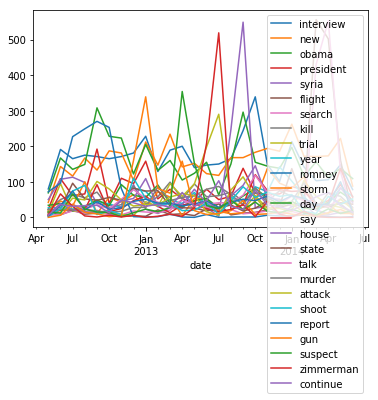

In [63]:
time_group_hot.plot()

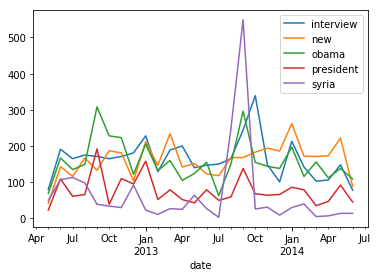

In [65]:
top_5_word=top_word['Word'][:5].values
time_group_hot_5 = time_group[top_5_word]
time_group_hot_5.plot()